# Random Walks on Real Data

The dataset used in our paper "From unbiased to maximal entropy random walks on hypergraphs" is hosted at https://www.cs.cornell.edu/∼arb/data/.

The data is devided into simplicial complexes and hypergraphs. In this notebook we reproduce the Figure used in the paper for the real hypergraph of **cat-edge-vegas-bars-reviews** used in the main text, and the Figure reported in the Appendix for hypergraphs:

*  **cat-edge-algebra-questions**: A hypergraph where nodes are users on MathOverflow and hyperedges are sets of users who answered a certain question category.
*  **cat-edge-geometry-questions**: A hypergraph where nodes are users on MathOverflow and hyperedges are sets of users who answered a particular question category.
*  **cat-edge-vegas-bars-reviews**: A hypergraph where the nodes are Yelp users and hyperedges are users who reviewed a bar of a particular category.
*  **cat-edge-madison-restaurant-reviews**: A hypergraph where the nodes are Yelp users and hyperedges are users who reviewed a restaurant of a particular category.
*  **cat-edge-music-blues-reviews**: A hypergraph where nodes are Amazon reviewers and hyperedges are reviewers who reviewed a specific type of blues music within a month timeframe.
*  **phs-email-W3C**: A hypergraph where nodes correspond to email addresses with a w3c.org domain and hyperedge consists of a set of email addresses, which have all appeared on the same email
*  **phs-email-Enron**:  A hypergraph where nodes correspond to email addresses and hyperedges consist of sets of email addresses, which have all appeared on the same email
*  **contact-high-school**: This dataset is a temporal sequence of timestamped hyperedges, which are composed of people (repeated hyperedges).
*  **contact-primary-school**: This dataset is a temporal sequence of timestamped hyperedges, which are composed of people (repeated hyperedges).

In [1]:
# set parent directory
import os
os.chdir('../')

In [2]:
from utils import HypergraphModels as HM
from utils import HypergraphStructure as HS
from utils import HypergraphRW as HRW
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb

plt.rcParams.update({'font.size': 16})
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'

colors = [ (44/255,144/255,177/255,255/255), (155/255,164/255,215/255,255/255),(91/255,198/255,229/255,255/255),(229/255,175/255,105/255,255/255)]
markers = ['s','o','d','*']

## cat-edge-vegas-bars-reviews
The format used is simple. The information we need is contained in the file 'cat-edge-vegas-bars-reviews/hyperedges.txt'.
Each row of the file corresponds to a hyperedge, and entries within a row represent the node indices belonging to the hyperedge.

In [3]:
data = 'cat-edge-vegas-bars-reviews'

# load the hypergraph from the data folder
N, H = HS.Read_Hypergraph_data_Benson(f'data/{data}')
print(f'The hypergraph has {N} nodes and {len(H)} hyperedges')

The hypergraph has 1236 nodes and 1194 hyperedges


In [4]:
# However the hypergraph may not be connected. Let's select the largest connected component 

N,H = HS.Giant_Component_Hypergraph(H,N)
print(f'We selcted the largest component of hypergraph. \nNow the hypergraph has {N} nodes and {len(H)} hyperedges')

We selcted the largest component of hypergraph. 
Now the hypergraph has 1234 nodes and 1194 hyperedges


In [5]:
# define the steps
A_ho = HS.Adjacency_HE_Normalized(H,N)
A_proj = HS.Adjacency_Count(H,N)

# compute stationary distributions
pi    =  HS.get_stationary_distribution(A_ho,'URW')    # URW-HO
phi   =  HS.get_stationary_distribution(A_ho,'MERW')   # MERW-HO
pi_p  =  HS.get_stationary_distribution(A_proj,'URW')  # URW-P
phi_p =  HS.get_stationary_distribution(A_proj,'MERW') # MERW_P

# compute partial hitting times
Ti_ho_urw = HRW.Tj_urw(HS.Laplacian(A_ho))     # URW-HO
Ti_ho_merw = HRW.Tj_merw(A_ho)                 # MERW-HO
Ti_p_urw =  HRW.Tj_urw(HS.Laplacian(A_proj))   # URW-P
Ti_p_merw = HRW.Tj_merw(A_proj)                # MERW_P

### Figure 10
In (a) the stationary distribution for the four types of random walks, while in (b) Partial mean hitting time, Tj , for the same four types of random walks.

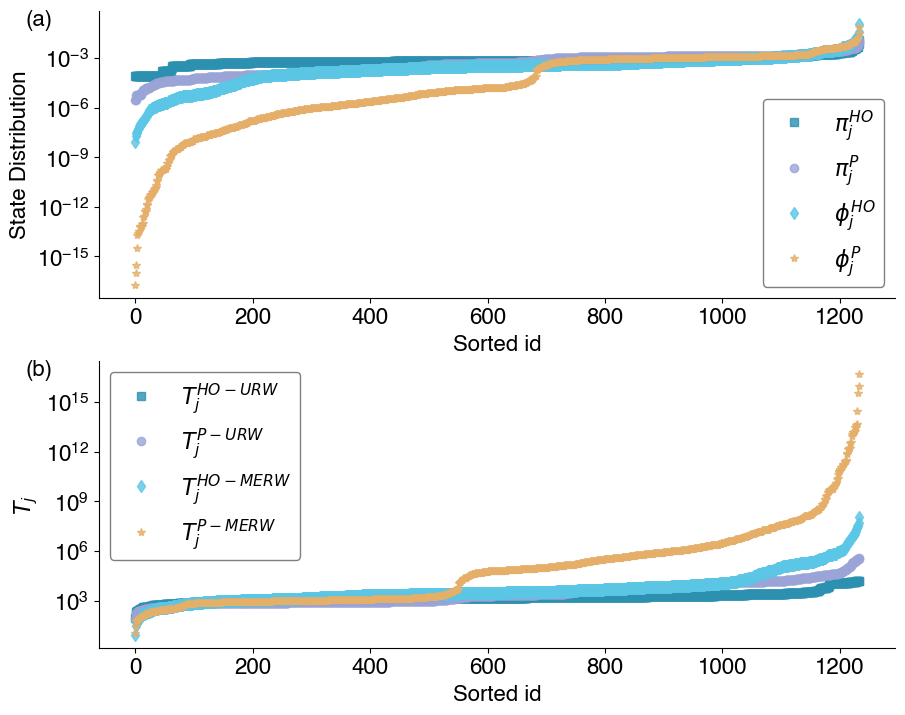

In [6]:
labels = [r'$\pi_{j}^{HO}$',r'$\pi_{j}^{P}$',r'$\phi_{j}^{HO}$',r'$\phi_{j}^{P}$']
labels_T = [r'$T_{j}^{HO-URW}$',r'$T_{j}^{P-URW}$',r'$T_{j}^{HO-MERW}$',r'$T_{j}^{P-MERW}$']

fig, axs = plt.subplots(2, 1, figsize=(9,7))

for i,y1,y2 in zip(range(4),[pi,pi_p,phi,phi_p],[Ti_ho_urw, Ti_p_urw,Ti_ho_merw,Ti_p_merw]):
    axs[0].semilogy(range(N), np.sort(y1), markers[i], c=colors[i], alpha=0.8, label=labels[i])
    axs[1].semilogy(range(N), np.sort(y2), markers[i], c=colors[i], alpha=0.8, label=labels_T[i])

axs[0].legend(loc=4, fancybox=True, edgecolor='k', framealpha=0.5)
axs[1].legend(loc=2, fancybox=True, edgecolor='k', framealpha=0.5)

axs[0].text(-0.075, 0.95, "(a)", ha="center", transform=axs[0].transAxes)
axs[1].text(-0.075, 0.95, "(b)", ha="center", transform=axs[1].transAxes)


axs[0].set_xlabel("Sorted id")
axs[1].set_xlabel("Sorted id")

axs[0].set_ylabel("State Distribution")
axs[1].set_ylabel(r'$T_j$')

fig.subplots_adjust(
top=0.995,
bottom=0.085,
left=0.105,
right=0.99,
hspace=0.22,
wspace=0.2
)
        
sb.despine()
plt.show()       
#plt.savefig("plots/Real_0.pdf");

### Figure 11
Comparative analysis of the different stationary distributions with their respective partial mean hitting time.

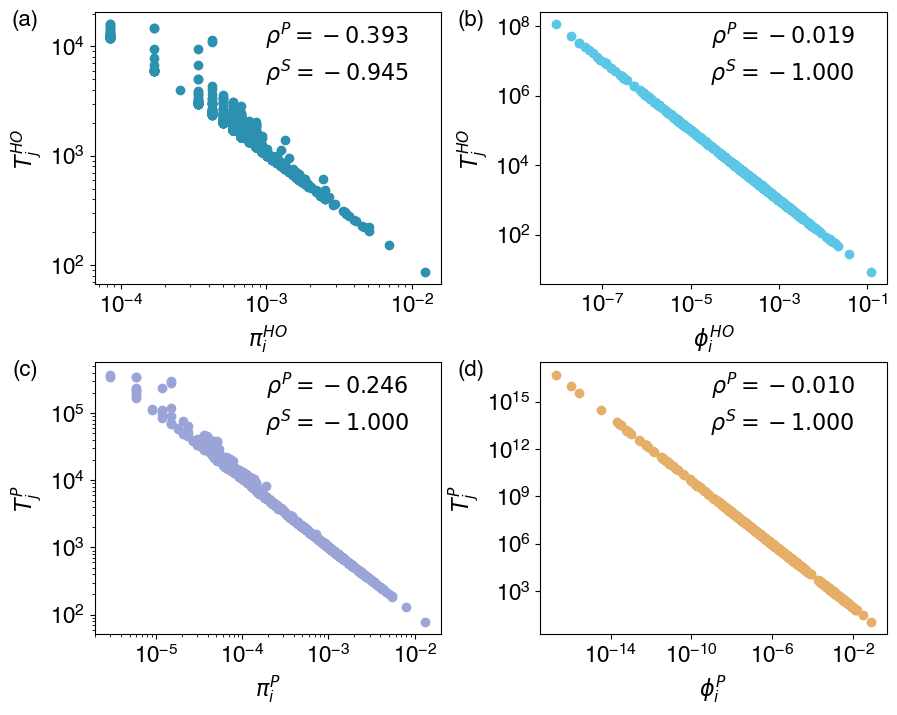

In [7]:
colors = [ (44/255,144/255,177/255,255/255), (91/255,198/255,229/255,255/255),(155/255,164/255,215/255,255/255),(229/255,175/255,105/255,255/255)]

fig, axs = plt.subplots(2, 2, figsize=(9,7))

for i,x,y in zip(range(4),[pi,phi,pi_p,phi_p],[Ti_ho_urw,Ti_ho_merw,Ti_p_urw,Ti_p_merw]):
    axs[i//2,i%2].loglog(x, y, 'o', c=colors[i])
    # compute statistic
    r = stats.pearsonr(x,y)
    s = stats.spearmanr(x,y)
    axs[i//2,i%2].text(0.7, 0.75, r'$\rho^S = %.3f$' % (s[0]), ha="center", transform=axs[i//2,i%2].transAxes)
    axs[i//2,i%2].text(0.7, 0.885, r'$\rho^P = %.3f$' % (r[0]), ha="center", transform=axs[i//2,i%2].transAxes)

axs[0,0].set_ylabel(r'$T_{j}^{HO}$')
axs[0,1].set_ylabel(r'$T_{j}^{HO}$')
axs[1,0].set_ylabel(r'$T_{j}^{P}$')
axs[1,1].set_ylabel(r'$T_{j}^{P}$')

axs[0,0].set_xlabel(r'$\pi_{i}^{HO}$')
axs[0,1].set_xlabel(r'$\phi_{i}^{HO}$')
axs[1,0].set_xlabel(r'$\pi_{i}^{P}$')
axs[1,1].set_xlabel(r'$\phi_{i}^{P}$')

axs[0,0].text(-0.2, 0.95, "(a)", ha="center", transform=axs[0,0].transAxes)
axs[0,1].text(-0.2, 0.95, "(b)", ha="center", transform=axs[0,1].transAxes)
axs[1,0].text(-0.2, 0.95, "(c)", ha="center", transform=axs[1,0].transAxes)
axs[1,1].text(-0.2, 0.95, "(d)", ha="center", transform=axs[1,1].transAxes)

fig.subplots_adjust(
top=0.994,
bottom=0.105,
left=0.115,
right=0.995,
hspace=0.287,
wspace=0.287
)

#plt.savefig("plots/Real_2.pdf");
plt.show()       

### Figure 12
Comparative analysis of the different stationary distributions.

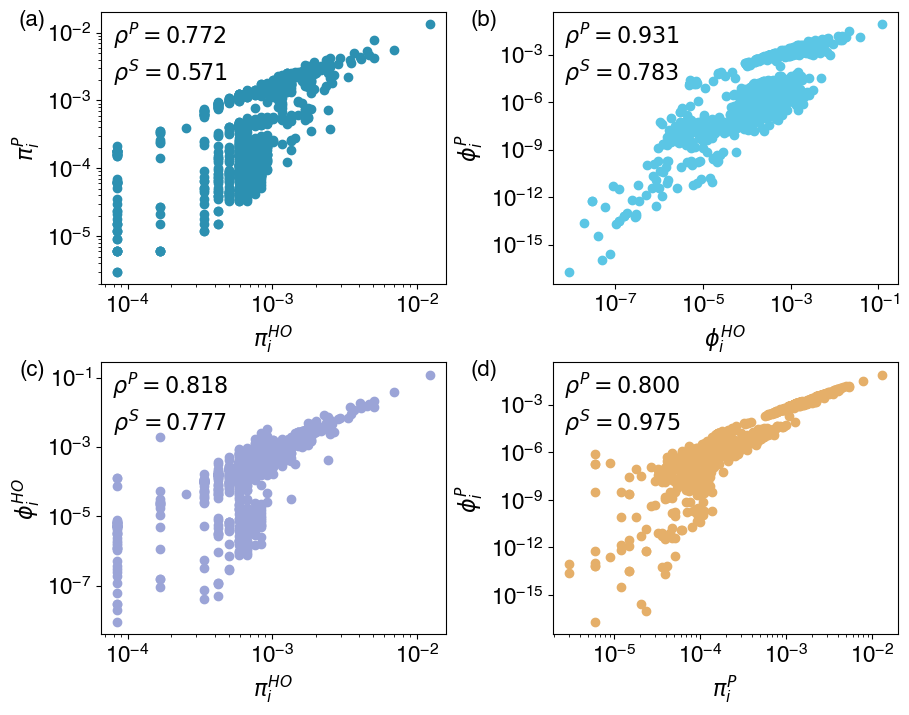

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

for i,x,y in zip(range(4),[pi,phi,pi,pi_p],[pi_p,phi_p,phi,phi_p]):
    axs[i//2,i%2].loglog(x, y, 'o', c=colors[i])
    # compute statistic
    r = stats.pearsonr(x,y)
    s = stats.spearmanr(x,y)
    axs[i//2,i%2].text(0.2, 0.75, r'$\rho^S = %.3f$' % (s[0]), ha="center", transform=axs[i//2,i%2].transAxes)
    axs[i//2,i%2].text(0.2, 0.885, r'$\rho^P = %.3f$' % (r[0]), ha="center", transform=axs[i//2,i%2].transAxes)

axs[0,0].set_ylabel(r'$\pi_{i}^{P}$')
axs[0,1].set_ylabel(r'$\phi_{i}^{P}$')
axs[1,0].set_ylabel(r'$\phi_{i}^{HO}$')
axs[1,1].set_ylabel(r'$\phi_{i}^{P}$')

axs[0,0].set_xlabel(r'$\pi_{i}^{HO}$')
axs[0,1].set_xlabel(r'$\phi_{i}^{HO}$')
axs[1,0].set_xlabel(r'$\pi_{i}^{HO}$')
axs[1,1].set_xlabel(r'$\pi_{i}^{P}$')

axs[0,0].text(-0.2, 0.95, "(a)", ha="center", transform=axs[0,0].transAxes)
axs[0,1].text(-0.2, 0.95, "(b)", ha="center", transform=axs[0,1].transAxes)
axs[1,0].text(-0.2, 0.95, "(c)", ha="center", transform=axs[1,0].transAxes)
axs[1,1].text(-0.2, 0.95, "(d)", ha="center", transform=axs[1,1].transAxes)

fig.subplots_adjust(
top=0.994,
bottom=0.105,
left=0.11,
right=0.995,
hspace=0.287,
wspace=0.312
)

#plt.savefig("plots/Real_1.pdf")     
plt.show()       

## Figure for Appendix
There are two formats used, that are dealt with two different reading function.

All the *cat-edge-...* and *phs-email-...* hypergraphs have the same format: they use the hyperedgelist (like previous case) and are handled by the function
```python
HS.Read_Hypergraph_data_Benson(file_name)
```

The other hypergraphs (*contact-...-school*) have the following format:

Consider an example dataset consisting of three simplices:
1. {1, 2, 3} at time 10
2. {2, 4} at time 15.
3. {1, 3, 4, 5} at time 21.
Then files would look as follows:

example-nverts.txt
3
2
4

example-simplices.xt
1
2
3
2
4
1
3
4
5

For such files we use the function
```python
HS.Read_simplex_Benson(file_name)
```

In [7]:
def Plot_real_hypergraph_distribution(file_name,ax):
    if 'contact' in file_name:
        N,H = HS.Read_simplex_Benson(f'data/{file_name}/{file_name}')
    else:
        N,H = HS.Read_Hypergraph_data_Benson(f'data/{file_name}')
    
    N, H = HS.Giant_Component_Hypergraph(H,N)
    print(f'The hypergraph {file_name} has {N} nodes and {len(H)} hyperedges')
    
    # define the steps
    A_ho = HS.Adjacency_HE_Normalized(H,N)
    A_proj = HS.Adjacency_Count(H,N)

    # compute stationary distributions
    pi    =  HS.get_stationary_distribution(A_ho,'URW')    # URW-HO
    phi   =  HS.get_stationary_distribution(A_ho,'MERW')   # MERW-HO
    pi_p  =  HS.get_stationary_distribution(A_proj,'URW')  # URW-P
    phi_p =  HS.get_stationary_distribution(A_proj,'MERW') # MERW_P

    # plot
    labels = [r'$\pi_{j}^{HO}$',r'$\pi_{j}^{P}$',r'$\phi_{j}^{HO}$',r'$\phi_{j}^{P}$']
    colors = [ (44/255,144/255,177/255,255/255), (155/255,164/255,215/255,255/255),(91/255,198/255,229/255,255/255),(229/255,175/255,105/255,255/255)]
    markers = ['s','o','d','*']
    for i,y1 in zip(range(4),[pi,pi_p,phi,phi_p]):
        ax.semilogy(range(N), np.sort(y1), markers[i], c=colors[i], alpha=0.8, label=labels[i])
    ax.set_title(file_name)
    return

    

The hypergraph cat-edge-algebra-questions has 420 nodes and 1267 hyperedges
The hypergraph cat-edge-geometry-questions has 580 nodes and 1193 hyperedges
The hypergraph cat-edge-vegas-bars-reviews has 1234 nodes and 1194 hyperedges
The hypergraph cat-edge-madison-restaurant-reviews has 565 nodes and 601 hyperedges
The hypergraph cat-edge-music-blues-reviews has 1104 nodes and 693 hyperedges
The hypergraph phs-email-Enron has 4423 nodes and 15653 hyperedges
The hypergraph phs-email-W3C has 13351 nodes and 19351 hyperedges
The hypergraph contact-primary-school has 242 nodes and 106879 hyperedges
The hypergraph contact-high-school has 327 nodes and 172035 hyperedges


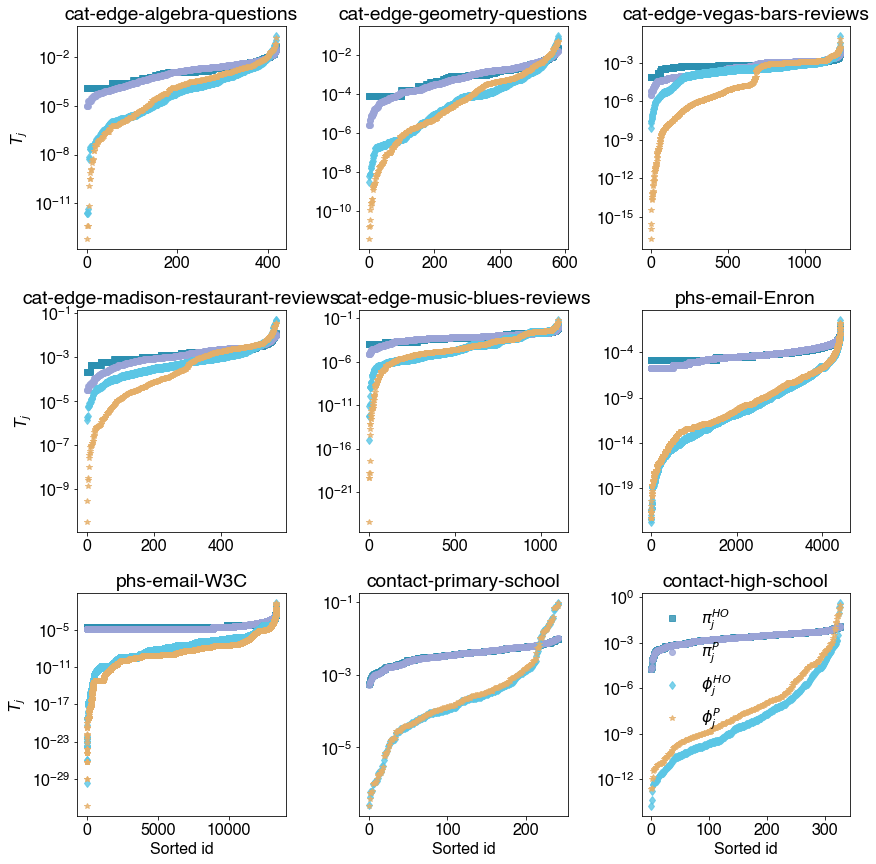

In [7]:
Database = ["cat-edge-algebra-questions", 
            "cat-edge-geometry-questions", 
            "cat-edge-vegas-bars-reviews", 
            "cat-edge-madison-restaurant-reviews", 
            "cat-edge-music-blues-reviews", 
            "phs-email-Enron", 
            "phs-email-W3C",
            "contact-primary-school",
            "contact-high-school"]

plt.rcParams.update({'font.size': 14})
plt.rcParams['svg.fonttype'] = 'none'

fig, axs = plt.subplots(3,3, figsize=(12,12))

for i,file_name in enumerate(Database):
    Plot_real_hypergraph_distribution(file_name, axs[i//3,i%3])

axs[2,2].legend(loc=4, fancybox=False, edgecolor='k', framealpha=0);

axs[0,0].set_ylabel("State Distribution")
axs[1,0].set_ylabel("State Distribution")
axs[2,0].set_ylabel("State Distribution")

axs[2,0].set_xlabel("Sorted id")
axs[2,1].set_xlabel("Sorted id")
axs[2,2].set_xlabel("Sorted id")

#plt.tight_layout();

fig.subplots_adjust(
top=0.972,
bottom=0.058,
left=0.078,
right=0.972,
hspace=0.273,
wspace=0.354
)


#plt.savefig("plots/Densities_RD.pdf")
plt.show()

In [3]:
def Plot_real_hypergraph_partial_times(file_name,ax):
    if 'contact' in file_name:
        N,H = HS.Read_simplex_Benson(f'data/{file_name}/{file_name}')
    else:
        N,H = HS.Read_Hypergraph_data_Benson(f'data/{file_name}')
    
    N, H = HS.Giant_Component_Hypergraph(H,N)
    print(f'The hypergraph {file_name} has {N} nodes and {len(H)} hyperedges')
    
    # define the steps
    A_ho = HS.Adjacency_HE_Normalized(H,N)
    A_proj = HS.Adjacency_Count(H,N)

    # compute partial hitting times
    Ti_ho_urw = HRW.Tj_urw(HS.Laplacian(A_ho))     # URW-HO
    Ti_ho_merw = HRW.Tj_merw(A_ho)                 # MERW-HO
    Ti_p_urw =  HRW.Tj_urw(HS.Laplacian(A_proj))   # URW-P
    Ti_p_merw = HRW.Tj_merw(A_proj)                # MERW_P

    # plot
    labels_T = [r'$T_{j}^{HO-URW}$',r'$T_{j}^{P-URW}$',r'$T_{j}^{HO-MERW}$',r'$T_{j}^{P-MERW}$']
    colors = [ (44/255,144/255,177/255,255/255), (155/255,164/255,215/255,255/255),(91/255,198/255,229/255,255/255),(229/255,175/255,105/255,255/255)]
    markers = ['s','o','d','*']
    for i,y1 in zip(range(4),[Ti_ho_urw, Ti_p_urw,Ti_ho_merw,Ti_p_merw]):
        ax.semilogy(range(N), np.sort(y1), markers[i], c=colors[i], alpha=0.8, label=labels_T[i])
    ax.set_title(file_name)
    return

The hypergraph cat-edge-algebra-questions has 420 nodes and 1267 hyperedges
The hypergraph cat-edge-geometry-questions has 580 nodes and 1193 hyperedges
The hypergraph cat-edge-vegas-bars-reviews has 1234 nodes and 1194 hyperedges
The hypergraph cat-edge-madison-restaurant-reviews has 565 nodes and 601 hyperedges
The hypergraph cat-edge-music-blues-reviews has 1104 nodes and 693 hyperedges
The hypergraph phs-email-Enron has 4423 nodes and 15653 hyperedges
The hypergraph contact-primary-school has 242 nodes and 106879 hyperedges
The hypergraph contact-high-school has 327 nodes and 172035 hyperedges


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


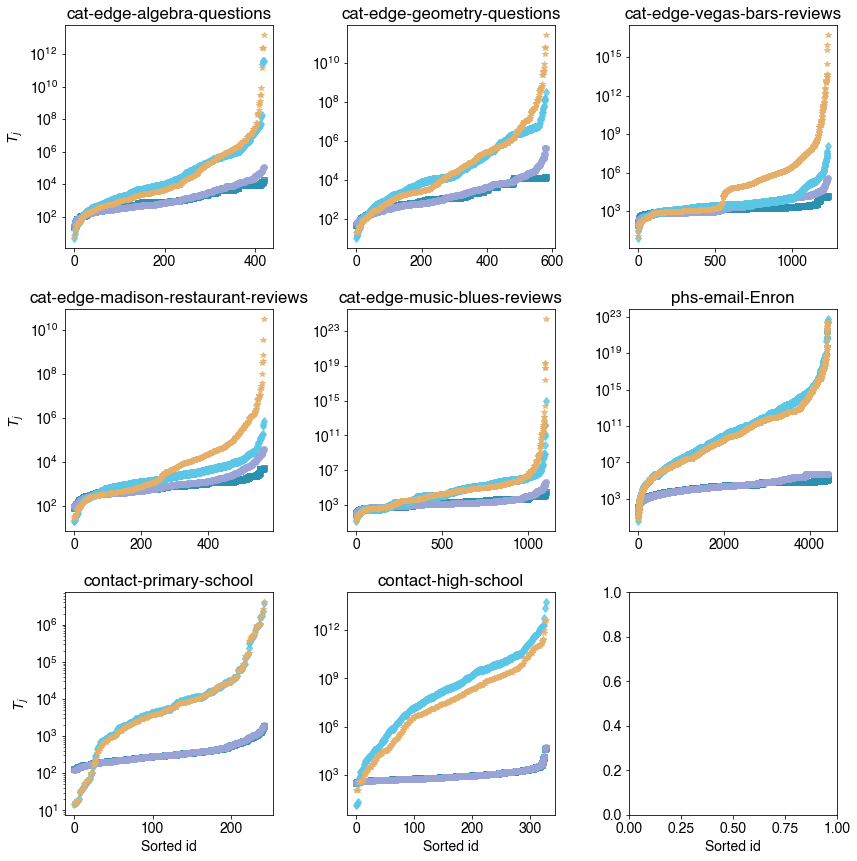

In [4]:
Database = ["cat-edge-algebra-questions", 
            "cat-edge-geometry-questions", 
            "cat-edge-vegas-bars-reviews", 
            "cat-edge-madison-restaurant-reviews", 
            "cat-edge-music-blues-reviews", 
            "phs-email-Enron", 
            #"phs-email-W3C", # this one is bigg, may take some time
            "contact-primary-school",
            "contact-high-school"]

plt.rcParams.update({'font.size': 14})
plt.rcParams['svg.fonttype'] = 'none'
fig, axs = plt.subplots(3,3, figsize=(12,12))

for i,file_name in enumerate(Database):
    Plot_real_hypergraph_partial_times(file_name, axs[i//3,i%3])

axs[2,1].legend(loc=2, fancybox=False, edgecolor='k', framealpha=0);

axs[0,0].set_ylabel(r'$T_j$')
axs[1,0].set_ylabel(r'$T_j$')
axs[2,0].set_ylabel(r'$T_j$')

axs[2,0].set_xlabel("Sorted id")
axs[2,1].set_xlabel("Sorted id")
axs[2,2].set_xlabel("Sorted id")

fig.subplots_adjust(
top=0.972,
bottom=0.058,
left=0.078,
right=0.972,
hspace=0.273,
wspace=0.354
)

#plt.savefig("plots/Time_RD.pdf")
plt.show()